#**CASE STUDY 02 MixITup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

##Load Data Excel

In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-12 08:46:08--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.14’

tau_unsup.py.14     100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2022-10-12 08:46:08 (24.8 MB/s) - ‘tau_unsup.py.14’ saved [17387/17387]



In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)
random_state = 99

In [ ]:
# Running Locally, yakinkan "file_" berada di folder "data"
try :
    data = pd.read_excel("data/Data_Studi_Kasus_2.xlsx", sheet_name=0)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://github.com/Nanasz/Kelompok7-DataMining2/blob/main/Data_Studi_Kasus_2.xlsx
    data = pd.read_excel("data/Data_Studi_Kasus_2.xlsx", sheet_name=0)
data.shape

(200, 10)

In [ ]:
data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


## Mengatasi MV

In [ ]:
data.isna().sum()

ID                       0
Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

kita tahu bahwa dalam dataset semua kolom tidak ada nilai yang kosong kecuali kolom Jenis Kelamin dengan 4 missing value, kolom Menikah dengan 12 missing value dan kolom Promo dengan 6 missing value

In [ ]:
# Mengatasi MV
data.dropna(subset = ['Jenis Kelamin', 'Menikah'], inplace = True)

In [ ]:
data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


Mengganti semua nilai yang kosong dengan angka nol di pandas dataframe.

## Melihat tipe data dalam tabel Mixltup

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(data))
# Ukuran Data
N, P = data.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 184, ', Kolom = ', 10)

Tipe data yang dimiliki adalah pandas dataframe.

In [ ]:
data.dtypes

ID                        int64
Jenis Kelamin            object
Umur                     object
Pendapatan-per-bulan      int64
skor-pengeluaran          int64
Menikah                  object
Kota                     object
Promo                   float64
HariFav                  object
FavFlavor                 int64
dtype: object

## Mengubah tipe data

In [ ]:
data['Kota'] = data['Kota'].replace('JJakarta', 'Jakarta')

In [ ]:
data['Umur'] = data['Umur'].replace("35'", 35)

In [ ]:
data['Promo'] = data['Promo'].replace(5.0, 4.0)

In [ ]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace('-', 'Wanita')

In [ ]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace(' ', 'Pria')

In [ ]:
data['FavFlavor'] = data['FavFlavor'].replace(9, 8)

In [ ]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].astype('category')
data['Pendapatan-per-bulan'] = data['Pendapatan-per-bulan'].astype('float64')
data['Umur'] = data['Umur'].astype('int64')
data['Kota'] = data['Kota'].astype('category')
data['Menikah'] = data['Menikah'].astype('category')
data['HariFav'] = data['HariFav'].astype('category')

Mengubah tipe data kolom jenis kelamin menjadi tipe data category.
Mengubah tipe data pendapatan per bulan menjadi tipe data float64.

In [ ]:
data.dtypes

ID                         int64
Jenis Kelamin           category
Umur                       int64
Pendapatan-per-bulan     float64
skor-pengeluaran           int64
Menikah                 category
Kota                    category
Promo                    float64
HariFav                 category
FavFlavor                  int64
dtype: object

## Menghapus data tidak penting

In [ ]:
# menghapus data yang tidak berguna
data.drop("ID", axis=1, inplace=True)

Menghapus data yang tidak berguna yaitu kolom ID.

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0


### Mengecek duplikat data

In [ ]:
# memeriksa duplikasi data
print(data.shape)
data.duplicated().sum()

(184, 9)


0

Tidak terdapat duplikasi pada data.

## Rumusan Masalah

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0


In [ ]:
## mengecek korelasi setiap variabel
data.corr()

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
Umur,1.000000,0.043004,-0.352578,0.296377,0.069881
Pendapatan-per-bulan,0.043004,1.000000,0.027424,0.050044,0.021031
skor-pengeluaran,-0.352578,0.027424,1.000000,-0.922774,-0.166474
Promo,0.296377,0.050044,-0.922774,1.000000,0.145757
FavFlavor,0.069881,0.021031,-0.166474,0.145757,1.000000


### Apakah jenis kelamin mempengaruhi banyaknya customer yang datang saat ada promo?

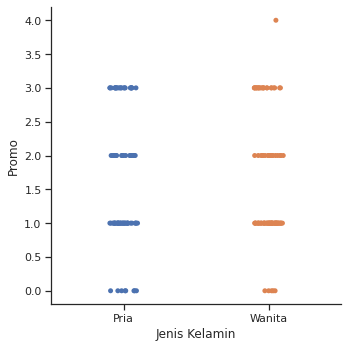

In [ ]:
p=sns.catplot(x="Jenis Kelamin",y = "Promo",data=data)
# Apa yang bisa di lihat dari hasil ini?

### Interpretasi
Dari hasil plot diatas, kecenderungan customer yang datang saat ada promo adalah sama, namum saat tidak ada promo lebih banyak pria yang datang. Baik customer pria maupun wanita akan banyak datang ke MixITup ketika ada promo.


### Apakah promo mempengaruhi hari favorit customer datang?

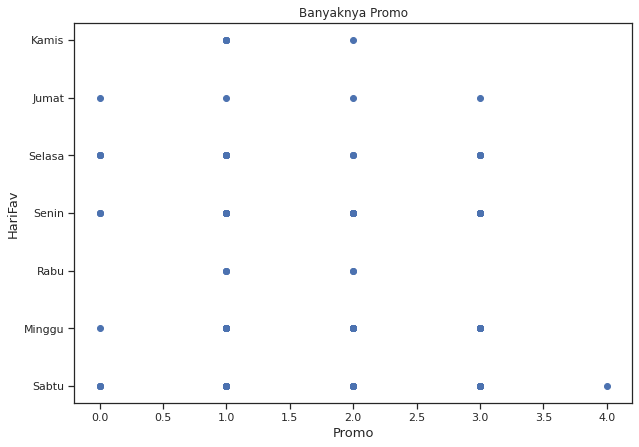

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x = data['Promo'], y = data['HariFav'])
plt.ylabel('HariFav', fontsize=13)
plt.xlabel('Promo', fontsize=13)
plt.title('Banyaknya Promo')
plt.show()

### Interpretasi
Dari hasil plot diatas, kecenderungan banyaknya promo di hari favorit yaitu pada hari Sabtu dengan promo hingga sebesar 4 persen.


### Apakah Kota mempengaruhi pendapatan per bulan?

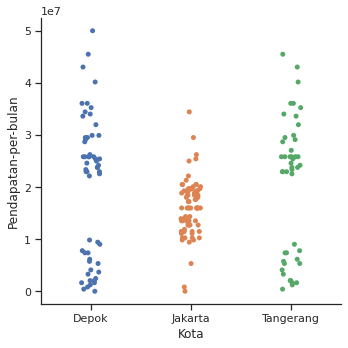

In [ ]:
q=sns.catplot(x="Kota",y = "Pendapatan-per-bulan",data=data)
# Apa yang bisa di lihat dari hasil ini?

### Interpretasi
Kecenderungan kota Depok memiliki pendapatan tertinggi. Sehingga bagi perusahaan dapat memperbanyak cabang Mixltup di daerah tersebut.

### Melihat Kecendrungan jenis kelamin berdasarkan rasa favorit

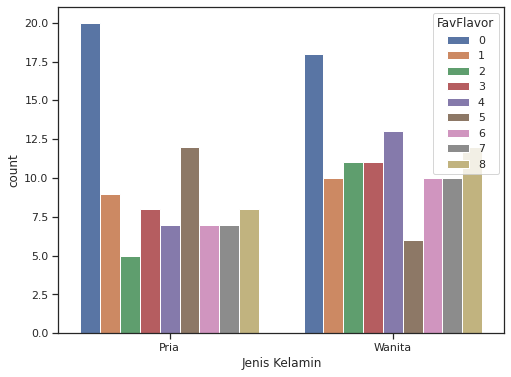

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Jenis Kelamin", hue="FavFlavor", data= data)

Interpretasi

Kecenderungan bahwa pria maupun wanita lebih banyak menyukai ice cream rasa vanila. Diperoleh dari data untuk pria sedikit pembelian ice cream rasa coklat, maka pelayan atau perusahaan dapat memberikan rekomendasi berupa share manfaat memakan ice cream coklat, dan dari data untuk wanita sedikit pembelian ice cream rasa coconut, maka pelayan atau perusahaan dapat memberikan rekomendasi berupa share manfaat memakan ice cream coconut sebagai upaya diet.




## melihat kecendrungan hari favorit berdasarkan rasa favorit

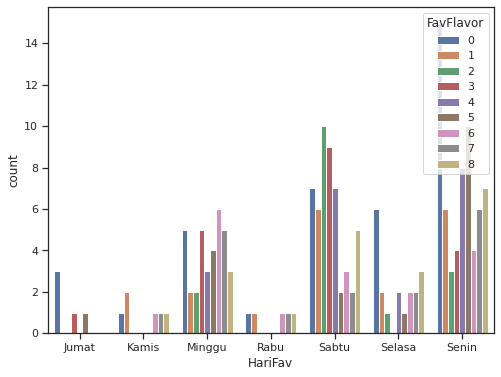

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="HariFav", hue="FavFlavor", data= data)

Kecenderungan terbanyak pembelian pada hari senin hingga sabtu adalah rasa vanilla, sedangkan pada hari rabu dan jumat sedikit pembeli, maka sebaiknya perusahaan melakukan promo jumat berkah di hari jumat sedangkan pada hari rabu dapat bekerja sama dengan influencer untuk menarik perhatian.

## Clustering 1

Dalam mengcluster menu favorit dibutuhkan skor pengeluaran customer di MixITup untuk menentukan nilai centroid awal dan nilai centroid awal akan di jadikan acuan awal untuk menentukan nilai centroid selanjutnya.

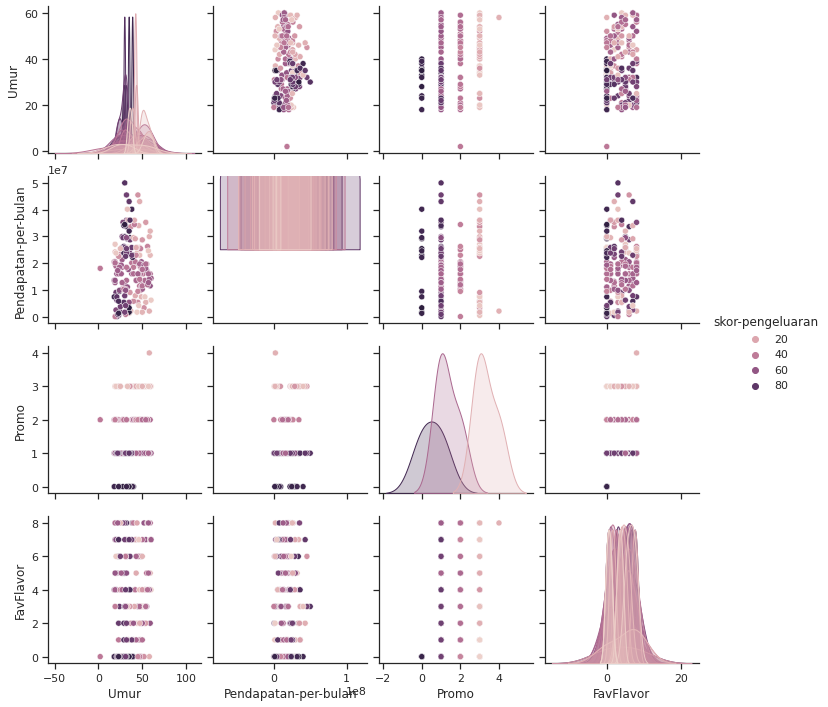

In [ ]:
g = sns.pairplot(data, hue="skor-pengeluaran")

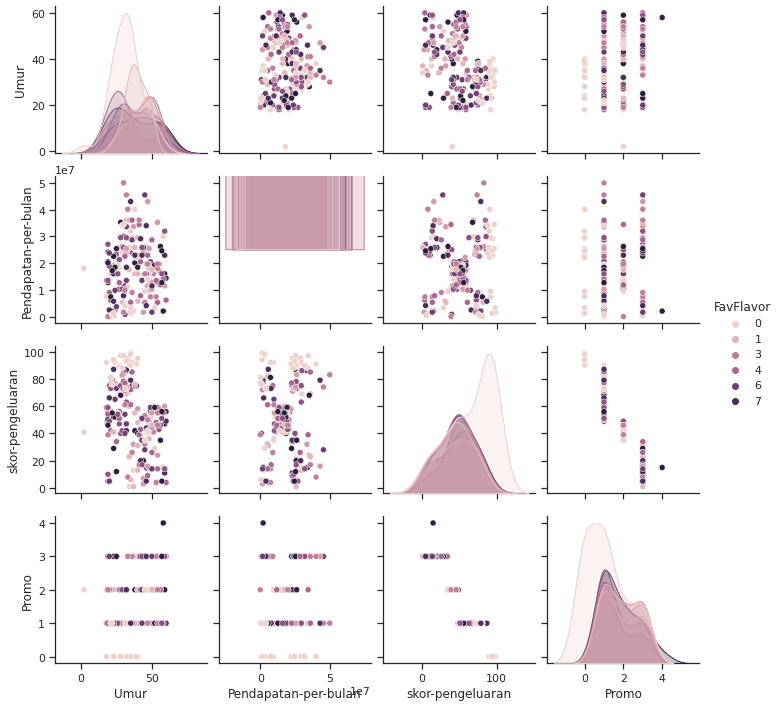

In [ ]:
h = sns.pairplot(data, hue="FavFlavor")

In [ ]:
# load the data
X = data[['FavFlavor']]#.values
C = data['skor-pengeluaran']#.values
print(X.shape)
data.sample(10)

(184, 1)


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
131,Pria,18,7377049.0,92,0,Depok,0.0,Selasa,0
183,Wanita,23,5737704.0,87,0,Depok,1.0,Senin,7
199,Pria,50,1639344.0,14,1,Tangerang,3.0,Minggu,6
61,Pria,46,19672131.0,52,1,Jakarta,1.0,Kamis,1
9,Wanita,21,19262295.0,42,1,Jakarta,2.0,Senin,4
137,Wanita,35,24180327.0,72,1,Depok,1.0,Senin,4
182,Wanita,47,43032786.0,16,1,Tangerang,3.0,Sabtu,2
112,Wanita,23,15983606.0,52,0,Jakarta,1.0,Senin,7
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0
7,Wanita,24,2049180.0,77,1,Depok,1.0,Senin,3


array([8, 6, 4, 1, 7, 0, 5, 4, 6, 2], dtype=int32)

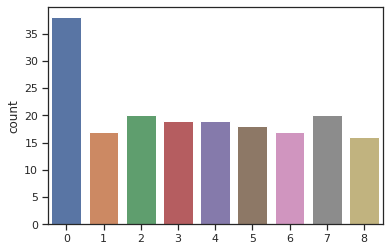

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=9
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

# hasil clusteringnya

sns.countplot(x=C_kmpp)
C_kmpp[:10]

Terindikasi bahwa dalam clustering untuk menentukan rasa favorit dapat di simpulkan bahwa dihasilkan 9 cluster yaitu cluster 0-9.

Data yang digunakan berjumlah 200 data dan untuk centroid awal ditentukan dengan cara random yaitu:


• Pada centroid 0 diambil dari rasa vanilla dengan skor pengeluaran 40.


• Pada centroid 1 diambil dari rasa strawberry dengan skor pengeluaran 16.


• Pada centroid 2 diambil dari rasa coklat dengan skor pengeluaran 20.


• Pada centroid 3 diambil dari rasa blueberry dengan skor pengeluaran 19.


• Pada centroid 4 diambil dari rasa bubble gum/cotton candy dengan skor pengeluaran 19.


• Pada centroid 5 diambil dari rasa coconut dengan skor pengeluaran 17.


• Pada centroid 6 diambil dari rasa caramel pecan dengan skor pengeluaran 16.


• Pada centroid 7 diambil dari rasa mix 2 flavor dengan skor pengeluaran 20.


• Pada centroid 8 diambil dari rasa mix 3 flavor dengan skor pengeluaran 15.


Dari masing-masing hasil
cluster yang didapat tersebut dipilih rasa favorit yang paling sering dipilih customer berdasarkan skor pengeluaran customer untuk menentukan rasa terfavorit yaitu pada cluster 0 yaitu yang memiliki nilai tertinggi pada es krim rasa vanilla dengan skor pengeluaran sebanyak 40.

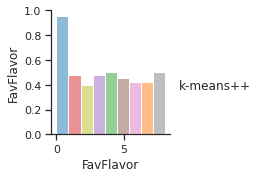

In [ ]:
# visualisasi setelah clustering
data['k-means++'] = C_kmpp
g = sns.pairplot(data[['FavFlavor','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

### Rekomendasi
- Jika perusahaan ingin mendapatkan pendapatan yang lebih besar, perusahaan bisa memperbanyak rasa Vanilla dan untuk rasa lainnya bisa diberi promo seperti buy 1 get 1 atau diberi diskon.

- Pada weekend sebaiknya diberi promo lebih banyak karena memungkinkan datangnya customer lebih banyak dari weekdays. Dan untuk weekdays agar pembeli tertarik untuk mendatangi Mixltup dapat menampilkan live music.

- Kecenderungan kota Depok memiliki pendapatan tertinggi. Sehingga bagi perusahaan dapat memperbanyak cabang Mixltup di daerah tersebut.

- Sebaiknya perusahaan melakukan promo jumat berkah di hari jumat sedangkan pada hari rabu dapat bekerja sama dengan influencer untuk menarik perhatian pembeli, karena berdasarkan data kecenderungan pembeli pada hari tersebut sedikit.

- Karena untuk pria sedikit pembelian ice cream rasa coklat, maka pelayan atau perusahaan dapat memberikan rekomendasi berupa share manfaat memakan ice cream coklat, dan dari data untuk wanita sedikit pembelian ice cream rasa coconut, maka pelayan atau perusahaan dapat memberikan rekomendasi berupa share manfaat memakan ice cream coconut sebagai upaya diet.
